# Visualization of Data

## Instructions

### Visualization of the german credit data
You need to **work collaboratively** to finish this task. The objective is
- To gain insights from the data via visualization and
- Identify groups of good credit risk and bad credit risk (i.e. good loan takers and bad loan takers).

This is the continuation of the previous task. You can find the data `german_credit_data.csv` saved under the [data](../data) folder.<br>
NOTE: **You can check the reference website**    

You already answered the questions in the previous task. Now we want to **visualize the finding below**.

- What are mean age, mean credit amount, and duration?
- What are the major three purpose of loan?
- What is the majoriry loan taker? Male of female?<br>

In order to gain the insights required, you may ask youself<br>
For both good loan and bad loan takers:
- What is the distrubition of purpose of loan?
- What is the distribution of age?
- What is the distribution of and amount of loan?
- Is there any correlation between the purpose of loan and gender?
- Is there any correlation between the purpose of loan and age group?
- ...etc.

You can think of any other method to analyse the data. As long as you can visualize it and help to gain insights on the good and bad loan takers.

Note:
- You are **ALLOWED** to import other library or package
- You can write you own functions
- Your answers should be readable with approprate comments
- You can refer to [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you are not familar with Markdown

### Reference
This dataset was sourced from Kaggle: https://www.kaggle.com/uciml/german-credit

The original source is: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

## Import libraries 

In [4]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Please perform your tasks below and answer the questions

### 1. Data preprocessing

In [2]:
df = pd.read_csv('/Users/yangyong/Documents/文稿/git/brickmovers_explor_and_vis-1/data/german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [7]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [13]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [17]:
df_dummy = pd.get_dummies(df)

### 2. correlation

In [18]:
df_dummy.corr()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Age,1.000000,0.015673,0.032716,-0.036136,-0.161694,0.161694,0.253058,0.006553,-0.212620,-0.044084,...,-0.078121,0.037504,-0.001772,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365
Job,0.015673,1.000000,0.285385,0.210910,-0.070298,0.070298,0.134972,-0.059393,-0.039195,-0.000350,...,-0.004059,-0.050099,0.001614,0.036762,-0.025979,-0.021672,0.013422,-0.027683,-0.092751,0.100544
Credit amount,0.032716,0.285385,1.000000,0.624984,-0.093482,0.093482,0.201643,-0.117497,-0.024611,-0.036443,...,0.119612,-0.100510,0.103016,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893
Duration,-0.036136,0.210910,0.624984,1.000000,-0.081432,0.081432,0.189117,-0.075169,-0.064417,-0.047228,...,0.089452,-0.076455,0.164113,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516
Sex_female,-0.161694,-0.070298,-0.093482,-0.081432,1.000000,-1.000000,-0.100872,-0.119638,0.222845,0.031244,...,0.012726,0.004183,-0.080875,-0.047893,0.045275,0.052397,0.100467,-0.008668,-0.026828,-0.014297
Sex_male,0.161694,0.070298,0.093482,0.081432,-1.000000,1.000000,0.100872,0.119638,-0.222845,-0.031244,...,-0.012726,-0.004183,0.080875,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297
Housing_free,0.253058,0.134972,0.201643,0.189117,-0.100872,0.100872,1.000000,-0.548445,-0.162474,0.012353,...,-0.000378,0.015860,-0.059613,0.126806,-0.038348,0.117976,-0.071530,-0.109357,0.013706,0.080010
Housing_own,0.006553,-0.059393,-0.117497,-0.075169,-0.119638,0.119638,-0.548445,1.000000,-0.735968,0.000276,...,0.001012,0.018934,0.051083,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288
Housing_rent,-0.212620,-0.039195,-0.024611,-0.064417,0.222845,-0.222845,-0.162474,-0.735968,1.000000,-0.010327,...,-0.000888,-0.035183,-0.012013,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460
Saving accounts_little,-0.044084,-0.000350,-0.036443,-0.047228,0.031244,-0.031244,0.012353,0.000276,-0.010327,1.000000,...,-0.047045,0.025329,-0.017202,-0.065771,-0.023200,-0.013679,0.100101,0.000728,0.010227,0.014341


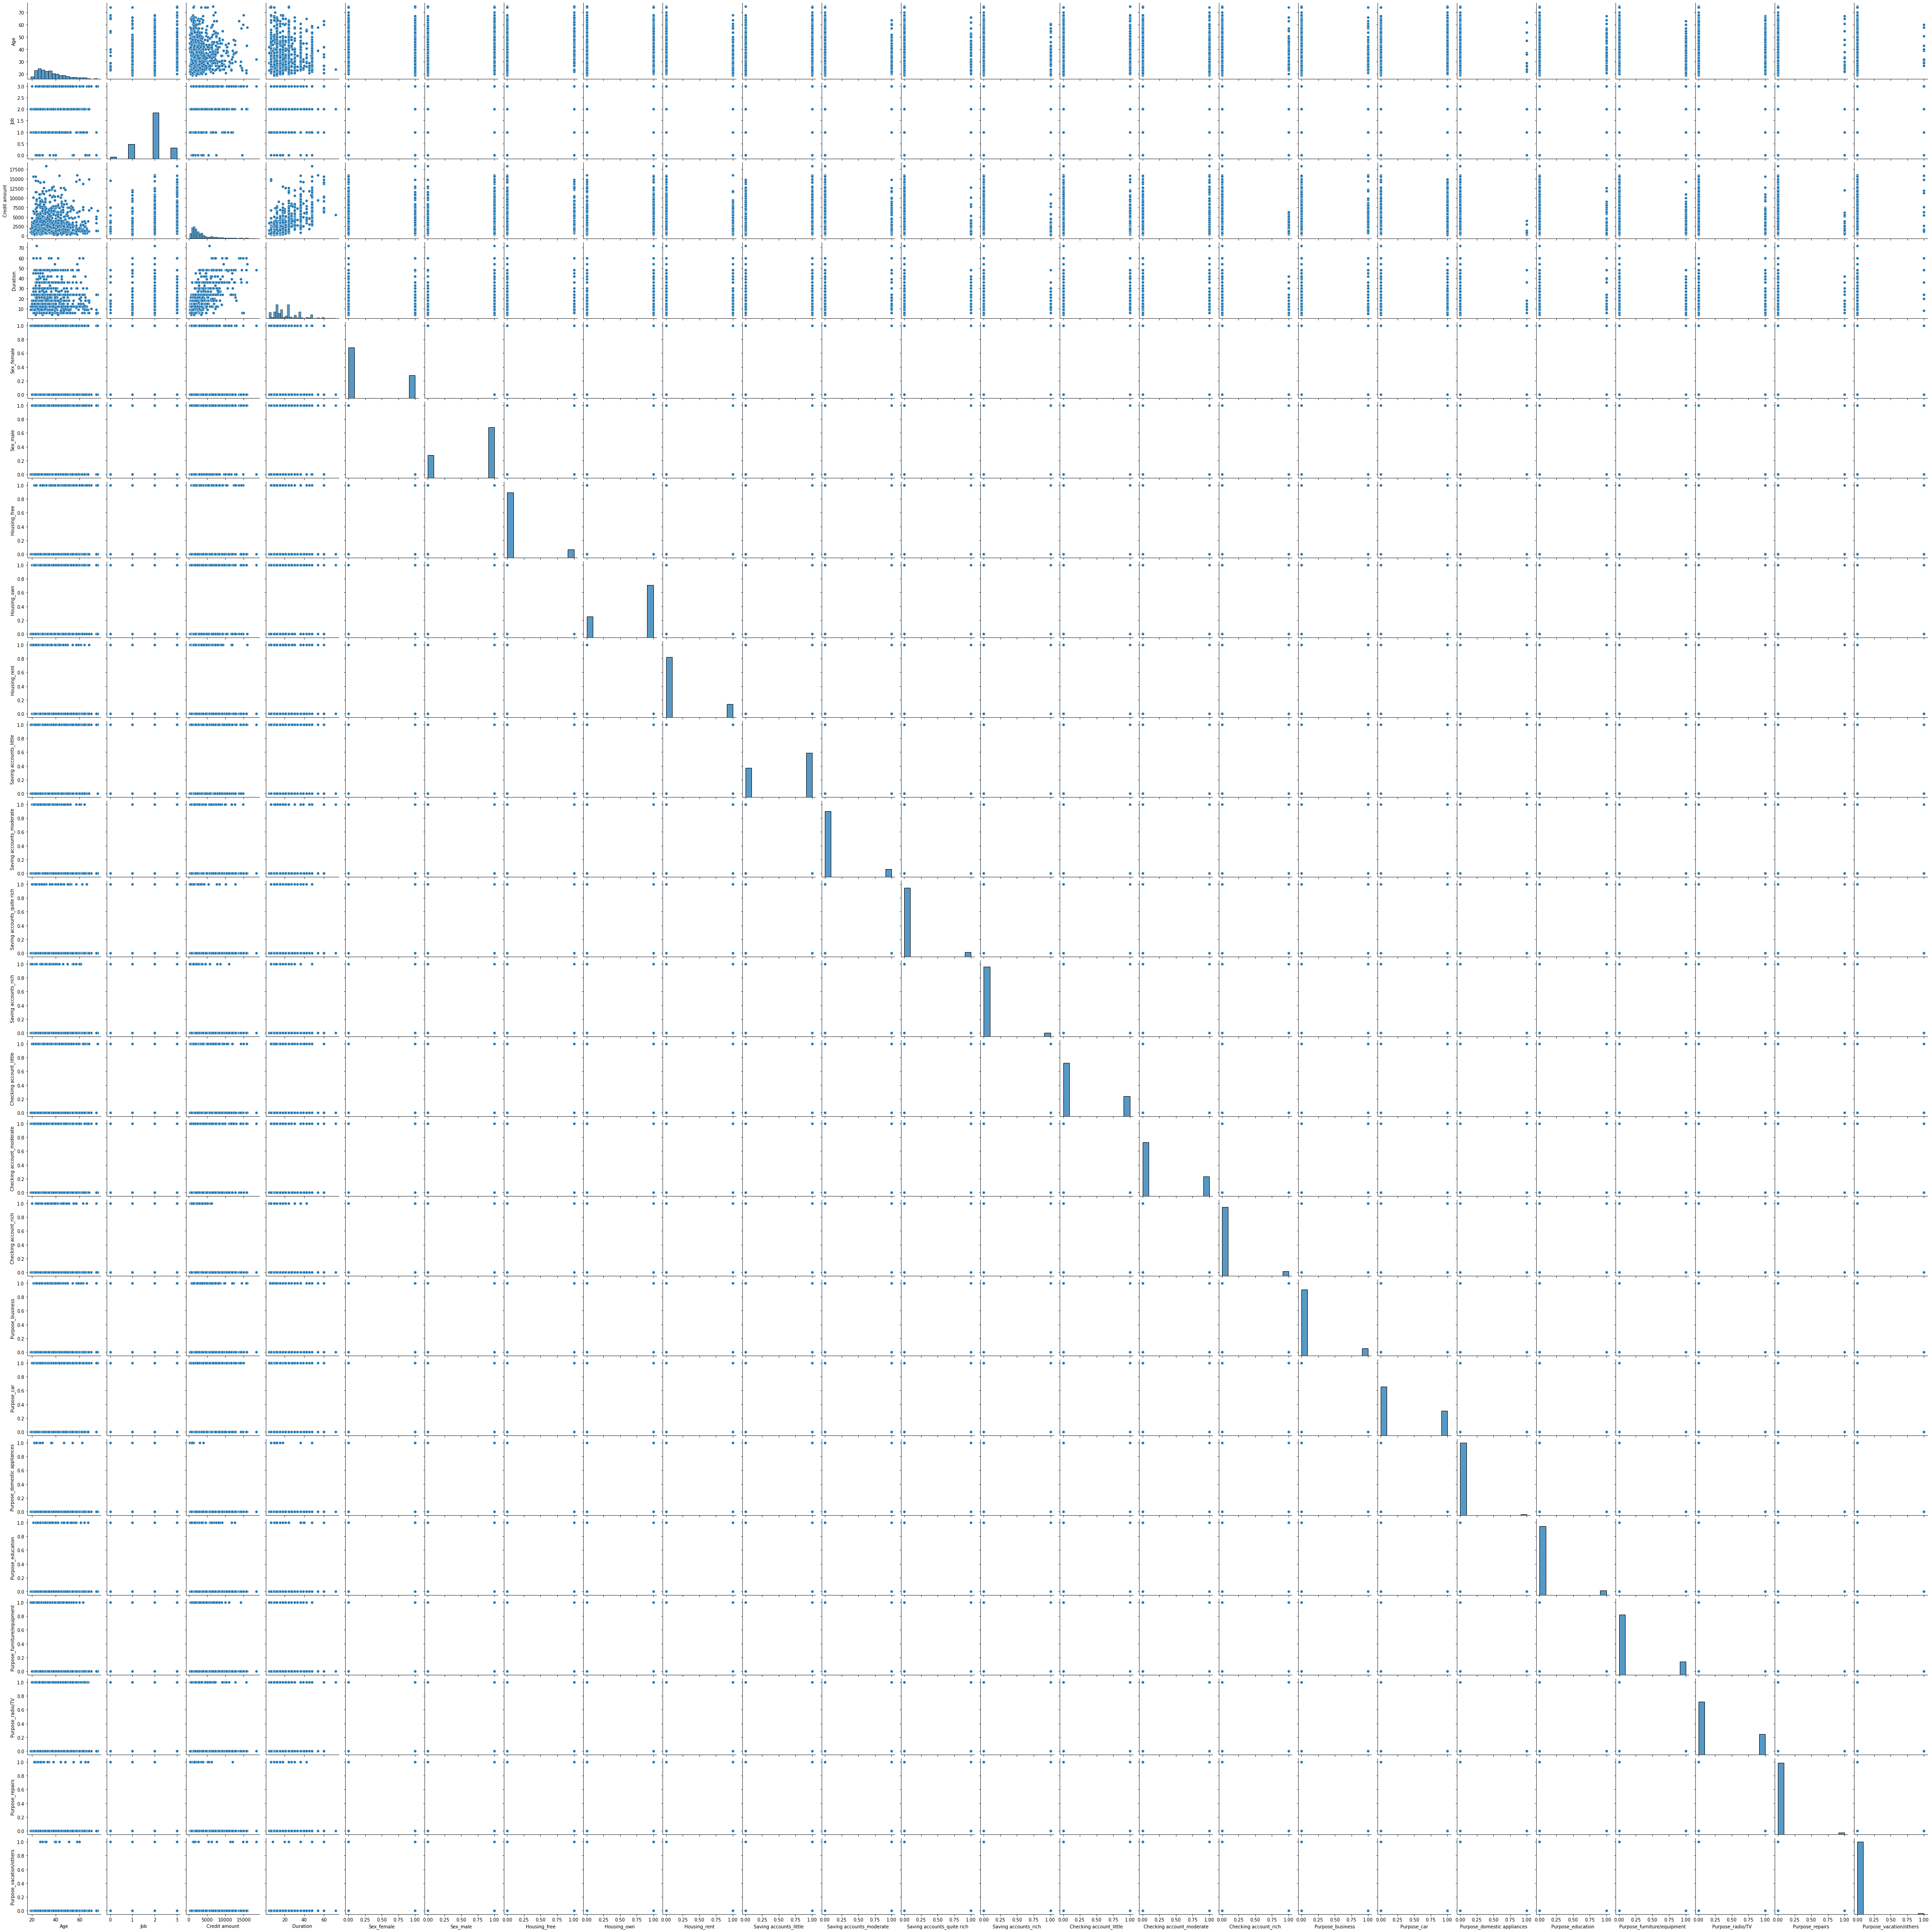

In [19]:
sns.pairplot(df_dummy)